
Training with learning rate: 0.1
Epoch 0, Loss: 188.16978454589844
Epoch 500, Loss: 2.0712313652038574
Epoch 1000, Loss: 2.0712313652038574
Epoch 1500, Loss: 2.0712313652038574
Epoch 2000, Loss: 2.0712313652038574
Epoch 2500, Loss: 2.0712313652038574
Epoch 3000, Loss: 2.0712313652038574
Epoch 3500, Loss: 2.0712313652038574
Epoch 4000, Loss: 2.0712313652038574
Epoch 4500, Loss: 2.0712313652038574

Training with learning rate: 0.01
Epoch 0, Loss: 194.255859375
Epoch 500, Loss: 2.072812557220459
Epoch 1000, Loss: 2.071230888366699
Epoch 1500, Loss: 2.0712311267852783
Epoch 2000, Loss: 2.0712311267852783
Epoch 2500, Loss: 2.0712311267852783
Epoch 3000, Loss: 2.0712311267852783
Epoch 3500, Loss: 2.0712311267852783
Epoch 4000, Loss: 2.0712311267852783
Epoch 4500, Loss: 2.0712311267852783

Training with learning rate: 0.001
Epoch 0, Loss: 178.71987915039062
Epoch 500, Loss: 26.437894821166992
Epoch 1000, Loss: 7.805885314941406
Epoch 1500, Loss: 3.6841986179351807
Epoch 2000, Loss: 2.5877823

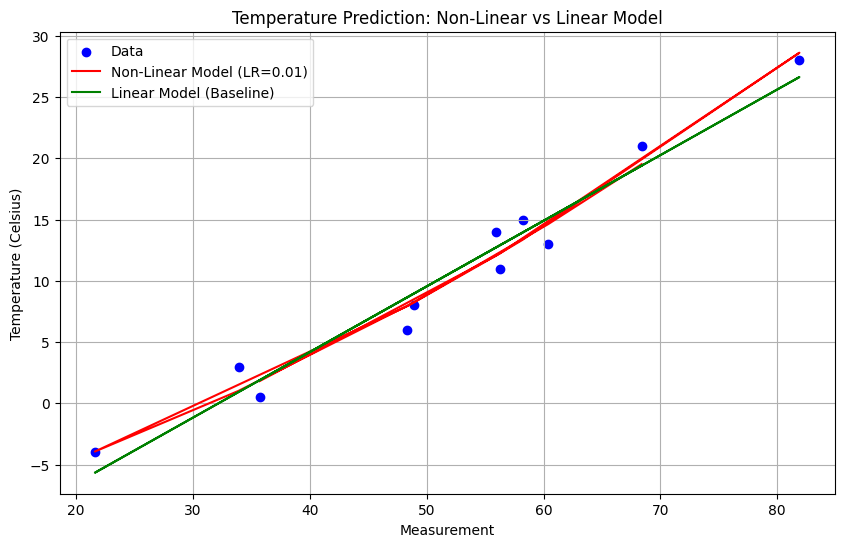

In [6]:
#Intro to ML Hoemwork 5
#Matthew Ewert
#801232199

#problem 1
import torch
from torch import nn, optim
import matplotlib.pyplot as plt

# Dataset
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0], dtype=torch.float32)  # Target temperatures in Celsius
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.6, 48.3, 60.4, 68.4], dtype=torch.float32)  # Measured values

# Normalize
t_u_normalized = (t_u - t_u.mean()) / t_u.std()

# non-linear model
class NonLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = nn.Parameter(torch.randn(()))
        self.w2 = nn.Parameter(torch.randn(()))
        self.b = nn.Parameter(torch.randn(()))

    def forward(self, x):
        return self.w2 * x**2 + self.w1 * x + self.b

# Training loop
def train_model(model, optimizer, X, y, num_epochs):
    loss_fn = nn.MSELoss()
    loss_history = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X)
        loss = loss_fn(output, y)
        loss.backward()
        optimizer.step()

        #500 epochs
        if epoch % 500 == 0:
            loss_history.append((epoch, loss.item()))
            print(f"Epoch {epoch}, Loss: {loss.item()}")

    return model, loss_history

# different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    model = NonLinearModel()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    print(f"\nTraining with learning rate: {lr}")
    trained_model, loss_history = train_model(model, optimizer, t_u_normalized, t_c, num_epochs=5000)
    results[lr] = {"model": trained_model, "loss_history": loss_history}

# best non-linear model based on the lowest final loss
best_lr = min(results, key=lambda lr: results[lr]["loss_history"][-1][1])
best_model = results[best_lr]["model"]
best_loss = results[best_lr]["loss_history"][-1][1]
print(f"\nBest Learning Rate: {best_lr}, Final Loss: {best_loss}")

# linear model for comparison
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.randn(()))
        self.b = nn.Parameter(torch.randn(()))

    def forward(self, x):
        return self.w * x + self.b

# Train the linear model (baseline)
linear_model = LinearModel()
optimizer = optim.SGD(linear_model.parameters(), lr=0.01)
trained_linear_model, linear_loss_history = train_model(linear_model, optimizer, t_u_normalized, t_c, num_epochs=5000)

# non-linear vs linear models
plt.figure(figsize=(10, 6))
plt.scatter(t_u, t_c, label="Data", color="blue")
plt.plot(
    t_u, best_model(t_u_normalized).detach(), label=f"Non-Linear Model (LR={best_lr})", color="red"
)
plt.plot(
    t_u, trained_linear_model(t_u_normalized).detach(), label="Linear Model (Baseline)", color="green"
)
plt.title("Temperature Prediction: Non-Linear vs Linear Model")
plt.xlabel("Measurement")
plt.ylabel("Temperature (Celsius)")
plt.legend()
plt.grid()
plt.show()



Training with learning rate: 0.001
Epoch 0, Training Loss: 1.2652500867843628, Validation Loss: 1.973203182220459
Epoch 500, Training Loss: 0.4991973042488098, Validation Loss: 0.9137061834335327
Epoch 1000, Training Loss: 0.4461117386817932, Validation Loss: 0.7879557609558105
Epoch 1500, Training Loss: 0.43944332003593445, Validation Loss: 0.7593355774879456
Epoch 2000, Training Loss: 0.4382152259349823, Validation Loss: 0.7501664757728577
Epoch 2500, Training Loss: 0.43793198466300964, Validation Loss: 0.7465878129005432
Epoch 3000, Training Loss: 0.4378591477870941, Validation Loss: 0.7450222969055176
Epoch 3500, Training Loss: 0.437839537858963, Validation Loss: 0.7442898750305176
Epoch 4000, Training Loss: 0.43783414363861084, Validation Loss: 0.7439333200454712
Epoch 4500, Training Loss: 0.43783268332481384, Validation Loss: 0.743755578994751

Training with learning rate: 0.0005
Epoch 0, Training Loss: 1.0909494161605835, Validation Loss: 1.6845052242279053
Epoch 500, Training 

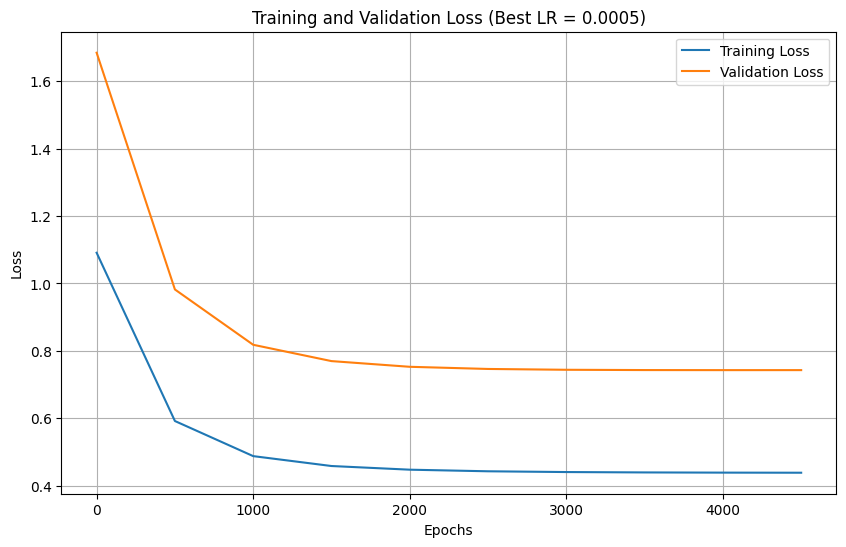

In [7]:
#problem 2
import torch
from torch import nn, optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv"
data = pd.read_csv(url)

# relevant features
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values.reshape(-1, 1)

# Split dataset into training andval sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)

# Normalize
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_val = scaler_y.transform(y_val)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

# Linear Regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Training
def train_model(model, optimizer, X_train, y_train, X_val, y_val, num_epochs):
    loss_fn = nn.MSELoss()
    loss_history = []
    val_loss_history = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = loss_fn(output, y_train)
        loss.backward()
        optimizer.step()

        # Val loss
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = loss_fn(val_output, y_val)

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")
            loss_history.append((epoch, loss.item()))
            val_loss_history.append((epoch, val_loss.item()))

    return model, loss_history, val_loss_history

# different learning rates
learning_rates = [0.001, 0.0005, 0.0001, 0.00005]
results = {}

for lr in learning_rates:
    model = LinearRegressionModel(input_dim=5)
    optimizer = optim.SGD(model.parameters(), lr=lr)
    print(f"\nTraining with learning rate: {lr}")
    trained_model, loss_history, val_loss_history = train_model(
        model, optimizer, X_train, y_train, X_val, y_val, num_epochs=5000
    )
    results[lr] = {
        "model": trained_model,
        "loss_history": loss_history,
        "val_loss_history": val_loss_history,
    }

# best model based on lowest validation loss
best_lr = min(results, key=lambda lr: results[lr]["val_loss_history"][-1][1])
best_model = results[best_lr]["model"]
best_val_loss = results[best_lr]["val_loss_history"][-1][1]

print(f"\nBest Learning Rate: {best_lr}, Final Validation Loss: {best_val_loss}")

# Plot
loss_history = results[best_lr]["loss_history"]
val_loss_history = results[best_lr]["val_loss_history"]

plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in loss_history], [x[1] for x in loss_history], label="Training Loss")
plt.plot([x[0] for x in val_loss_history], [x[1] for x in val_loss_history], label="Validation Loss")
plt.title(f"Training and Validation Loss (Best LR = {best_lr})")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()



Training with learning rate: 0.001
Epoch 0, Training Loss: 1.1891447305679321, Validation Loss: 1.9656097888946533
Epoch 500, Training Loss: 0.3650876581668854, Validation Loss: 0.638716995716095
Epoch 1000, Training Loss: 0.3078444004058838, Validation Loss: 0.5407177209854126
Epoch 1500, Training Loss: 0.2924143671989441, Validation Loss: 0.5235028862953186
Epoch 2000, Training Loss: 0.28664085268974304, Validation Loss: 0.5193274021148682
Epoch 2500, Training Loss: 0.2839612364768982, Validation Loss: 0.5176756381988525
Epoch 3000, Training Loss: 0.282423198223114, Validation Loss: 0.5164701342582703
Epoch 3500, Training Loss: 0.2813892960548401, Validation Loss: 0.5153302550315857
Epoch 4000, Training Loss: 0.28062674403190613, Validation Loss: 0.5142266154289246
Epoch 4500, Training Loss: 0.2800360321998596, Validation Loss: 0.5131838917732239

Training with learning rate: 0.0005
Epoch 0, Training Loss: 1.0046923160552979, Validation Loss: 1.5329225063323975
Epoch 500, Training L

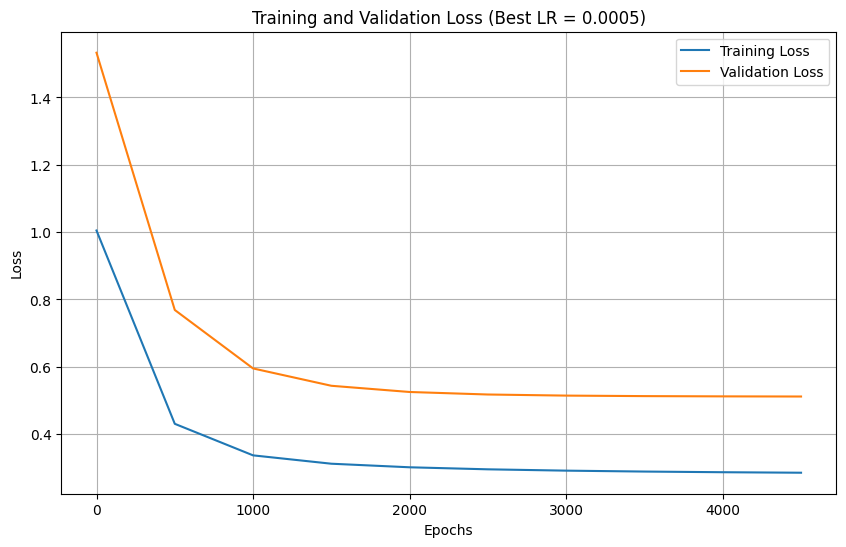

In [8]:
#problem 3
import torch
from torch import nn, optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv"
data = pd.read_csv(url)

# categorical and numeric columns
categorical_columns = data.select_dtypes(include=['object']).columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.drop('price')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

X = data.drop(columns=['price'])
y = data['price'].values.reshape(-1, 1)

X_processed = preprocessor.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# training and val sets
X_train, X_val, y_train, y_val = train_test_split(X_processed, y_scaled, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

# Linear Regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Training
def train_model(model, optimizer, X_train, y_train, X_val, y_val, num_epochs):
    loss_fn = nn.MSELoss()
    loss_history = []
    val_loss_history = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = loss_fn(output, y_train)
        loss.backward()
        optimizer.step()

        # Val loss
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = loss_fn(val_output, y_val)

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")
            loss_history.append((epoch, loss.item()))
            val_loss_history.append((epoch, val_loss.item()))

    return model, loss_history, val_loss_history

# different learning rates
learning_rates = [0.001, 0.0005, 0.0001, 0.00005]
results = {}

for lr in learning_rates:
    model = LinearRegressionModel(input_dim=X_train.shape[1])
    optimizer = optim.SGD(model.parameters(), lr=lr)
    print(f"\nTraining with learning rate: {lr}")
    trained_model, loss_history, val_loss_history = train_model(
        model, optimizer, X_train, y_train, X_val, y_val, num_epochs=5000
    )
    results[lr] = {
        "model": trained_model,
        "loss_history": loss_history,
        "val_loss_history": val_loss_history,
    }

# best model based on lowest validation loss
best_lr = min(results, key=lambda lr: results[lr]["val_loss_history"][-1][1])
best_model = results[best_lr]["model"]
best_val_loss = results[best_lr]["val_loss_history"][-1][1]

print(f"\nBest Learning Rate: {best_lr}, Final Validation Loss: {best_val_loss}")

# Plot
loss_history = results[best_lr]["loss_history"]
val_loss_history = results[best_lr]["val_loss_history"]

plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in loss_history], [x[1] for x in loss_history], label="Training Loss")
plt.plot([x[0] for x in val_loss_history], [x[1] for x in val_loss_history], label="Validation Loss")
plt.title(f"Training and Validation Loss (Best LR = {best_lr})")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()
